In [1]:
### Change dir

import os
os.chdir(os.pardir)

In [2]:
### import modules

import numpy as np
import pandas as pd

### read dataset
df = pd.read_excel('raw_data/refined_data.xlsx')

print("===== summary =====")
print(df)

===== summary =====
                                   ID   EXT   NEU   AGR   CON   OPN
0    00419a4c96b32cd63b2c7196da761274  1.90  4.15  3.15  4.65  3.45
1    02c37028a782cfda660c7243e45244bb  2.05  4.00  2.20  2.20  3.75
2    03133a828cd0cf52e3752813ce5d818f  3.84  3.55  2.85  4.32  3.45
3    03e6c4eca4269c183fa0e1780f73faba  3.20  3.60  3.85  4.35  4.80
4    06b055f8e2bca96496514891057913c3  2.85  2.35  3.35  4.70  3.35
..                                ...   ...   ...   ...   ...   ...
245  f83aa7290cf3ae8ed75d6aee5ebbb559  2.65  1.70  3.95  3.00  3.15
246  fbe5aa478508d1dc931427ade5d9e1b4  3.25  2.75  2.25  4.00  4.00
247  fc1c9fb6c64740edcbbf8cfe9dde8b02  3.55  2.25  3.90  2.80  4.00
248  fe22087986fdcc65939c793fe0ec90a9  3.45  2.55  3.15  3.50  2.90
249  fffafe151f07a30a0ede2038a897b680  3.05  1.80  3.35  2.95  4.35

[250 rows x 6 columns]


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# DataFrame to NumPy array
data = df.iloc[:, 1:].values

# calculation cosine similarity about all items
cosine_sim_matrix = cosine_similarity(data)

# result
for i in range(len(cosine_sim_matrix)):
    for j in range(i + 1, len(cosine_sim_matrix)):
        print(f"Cosine similarity between row {i + 1} and row {j + 1}: {round(cosine_sim_matrix[i, j], 2)}")


Cosine similarity between row 1 and row 2: 0.95
Cosine similarity between row 1 and row 3: 0.97
Cosine similarity between row 1 and row 4: 0.98
Cosine similarity between row 1 and row 5: 0.97
Cosine similarity between row 1 and row 6: 0.96
Cosine similarity between row 1 and row 7: 0.9
Cosine similarity between row 1 and row 8: 0.92
Cosine similarity between row 1 and row 9: 0.92
Cosine similarity between row 1 and row 10: 0.97
Cosine similarity between row 1 and row 11: 0.92
Cosine similarity between row 1 and row 12: 0.96
Cosine similarity between row 1 and row 13: 0.91
Cosine similarity between row 1 and row 14: 0.95
Cosine similarity between row 1 and row 15: 0.93
Cosine similarity between row 1 and row 16: 0.96
Cosine similarity between row 1 and row 17: 0.93
Cosine similarity between row 1 and row 18: 0.97
Cosine similarity between row 1 and row 19: 0.87
Cosine similarity between row 1 and row 20: 0.93
Cosine similarity between row 1 and row 21: 0.94
Cosine similarity between row

In [4]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# DataFrame to NumPy array
data = df.iloc[:, 1:].values

# calculation cosine similarity about all items
cosine_sim_matrix = cosine_similarity(data)

# declare a list to save data
similarity_results = []

# save result of cosine similarity (i != j)
for i in range(len(cosine_sim_matrix)):
    for j in range(i + 1, len(cosine_sim_matrix)):
        similarity_results.append([i + 1, j + 1, cosine_sim_matrix[i, j]])

# pandas DataFrame
similarity_df = pd.DataFrame(similarity_results, columns=["Row1", "Row2", "Cosine Similarity"])

# save CSV file
similarity_df.to_csv('result/cosine_similarity_results.csv', index=False)

print("Data saved as a CSV file.")


Data saved as a CSV file.


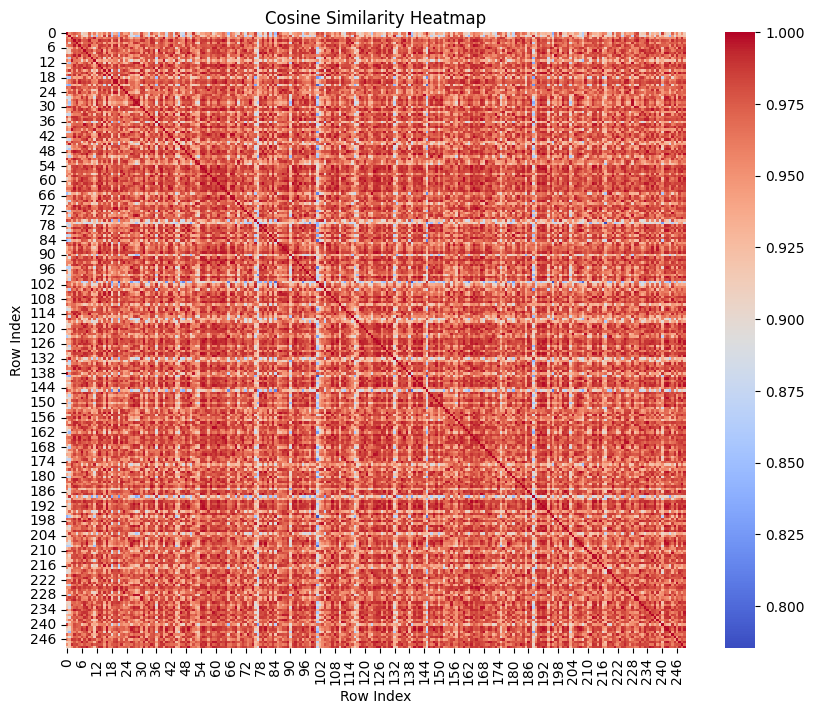

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# # DataFrame to NumPy array
data = df.iloc[:, 1:].values

# cosine similarity
cosine_sim_matrix = cosine_similarity(data)

# to pandas DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.index, columns=df.index)

# save cosine similarity
cosine_sim_df.to_csv('result/cosine.csv', index=False)

# heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap='coolwarm', annot=False, cbar=True)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Row Index')
plt.ylabel('Row Index')
plt.show()
